## Cyber Threat Detection

## Data Loading

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,         
    confusion_matrix,
    classification_report   
)

In [3]:
column_names = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

data = pd.read_csv(r"C:\Users\SAMI ULLAH\Desktop\cyber-threat-detection-ml\data\KDDTest+.csv", names=column_names, header=None)

# Drop 'difficulty' column (not useful for modeling)
# data.drop('difficulty', axis=1, inplace=True)
# data.drop('num_outbound_cmds', axis=1, inplace=True)


# Check a few rows
print(data.head(5))

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2       

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22543.0,218.868784,1407.207069,0.0,0.00,0.00,0.000,57715.0
src_bytes,22543.0,10395.911325,472796.912693,0.0,0.00,54.00,287.000,62825648.0
dst_bytes,22543.0,2056.110012,21219.763847,0.0,0.00,46.00,601.000,1345927.0
land,22543.0,0.000311,0.017619,0.0,0.00,0.00,0.000,1.0
wrong_fragment,22543.0,0.008428,0.142602,0.0,0.00,0.00,0.000,3.0
urgent,22543.0,0.000710,0.036474,0.0,0.00,0.00,0.000,3.0
hot,22543.0,0.105399,0.928448,0.0,0.00,0.00,0.000,101.0
num_failed_logins,22543.0,0.021648,0.150331,0.0,0.00,0.00,0.000,4.0
logged_in,22543.0,0.442222,0.496661,0.0,0.00,0.00,1.000,1.0
num_compromised,22543.0,0.119904,7.269758,0.0,0.00,0.00,0.000,796.0


## Checking for missing values

In [6]:
data.isnull().sum()# result data has no missing values

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
# Helper function for deeper analysis
def unique_values(data, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = data[column_name].unique()
        value_counts = data[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

cat_features = data.select_dtypes(include='object').columns
unique_values(data, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'icmp' 'udp']

Value Counts:
protocol_type
tcp     18880
udp      2620
icmp     1043
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (63): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin']

Value Counts:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
IRC          13
printer      11
ntp_u        10
rje           8
tim_i

## Handle Duplication

In [8]:
data.duplicated().sum()  # Check for duplicates

np.int64(0)

## Outlier Handling

In [9]:
data.shape

(22543, 43)

<Figure size 2000x4000 with 0 Axes>

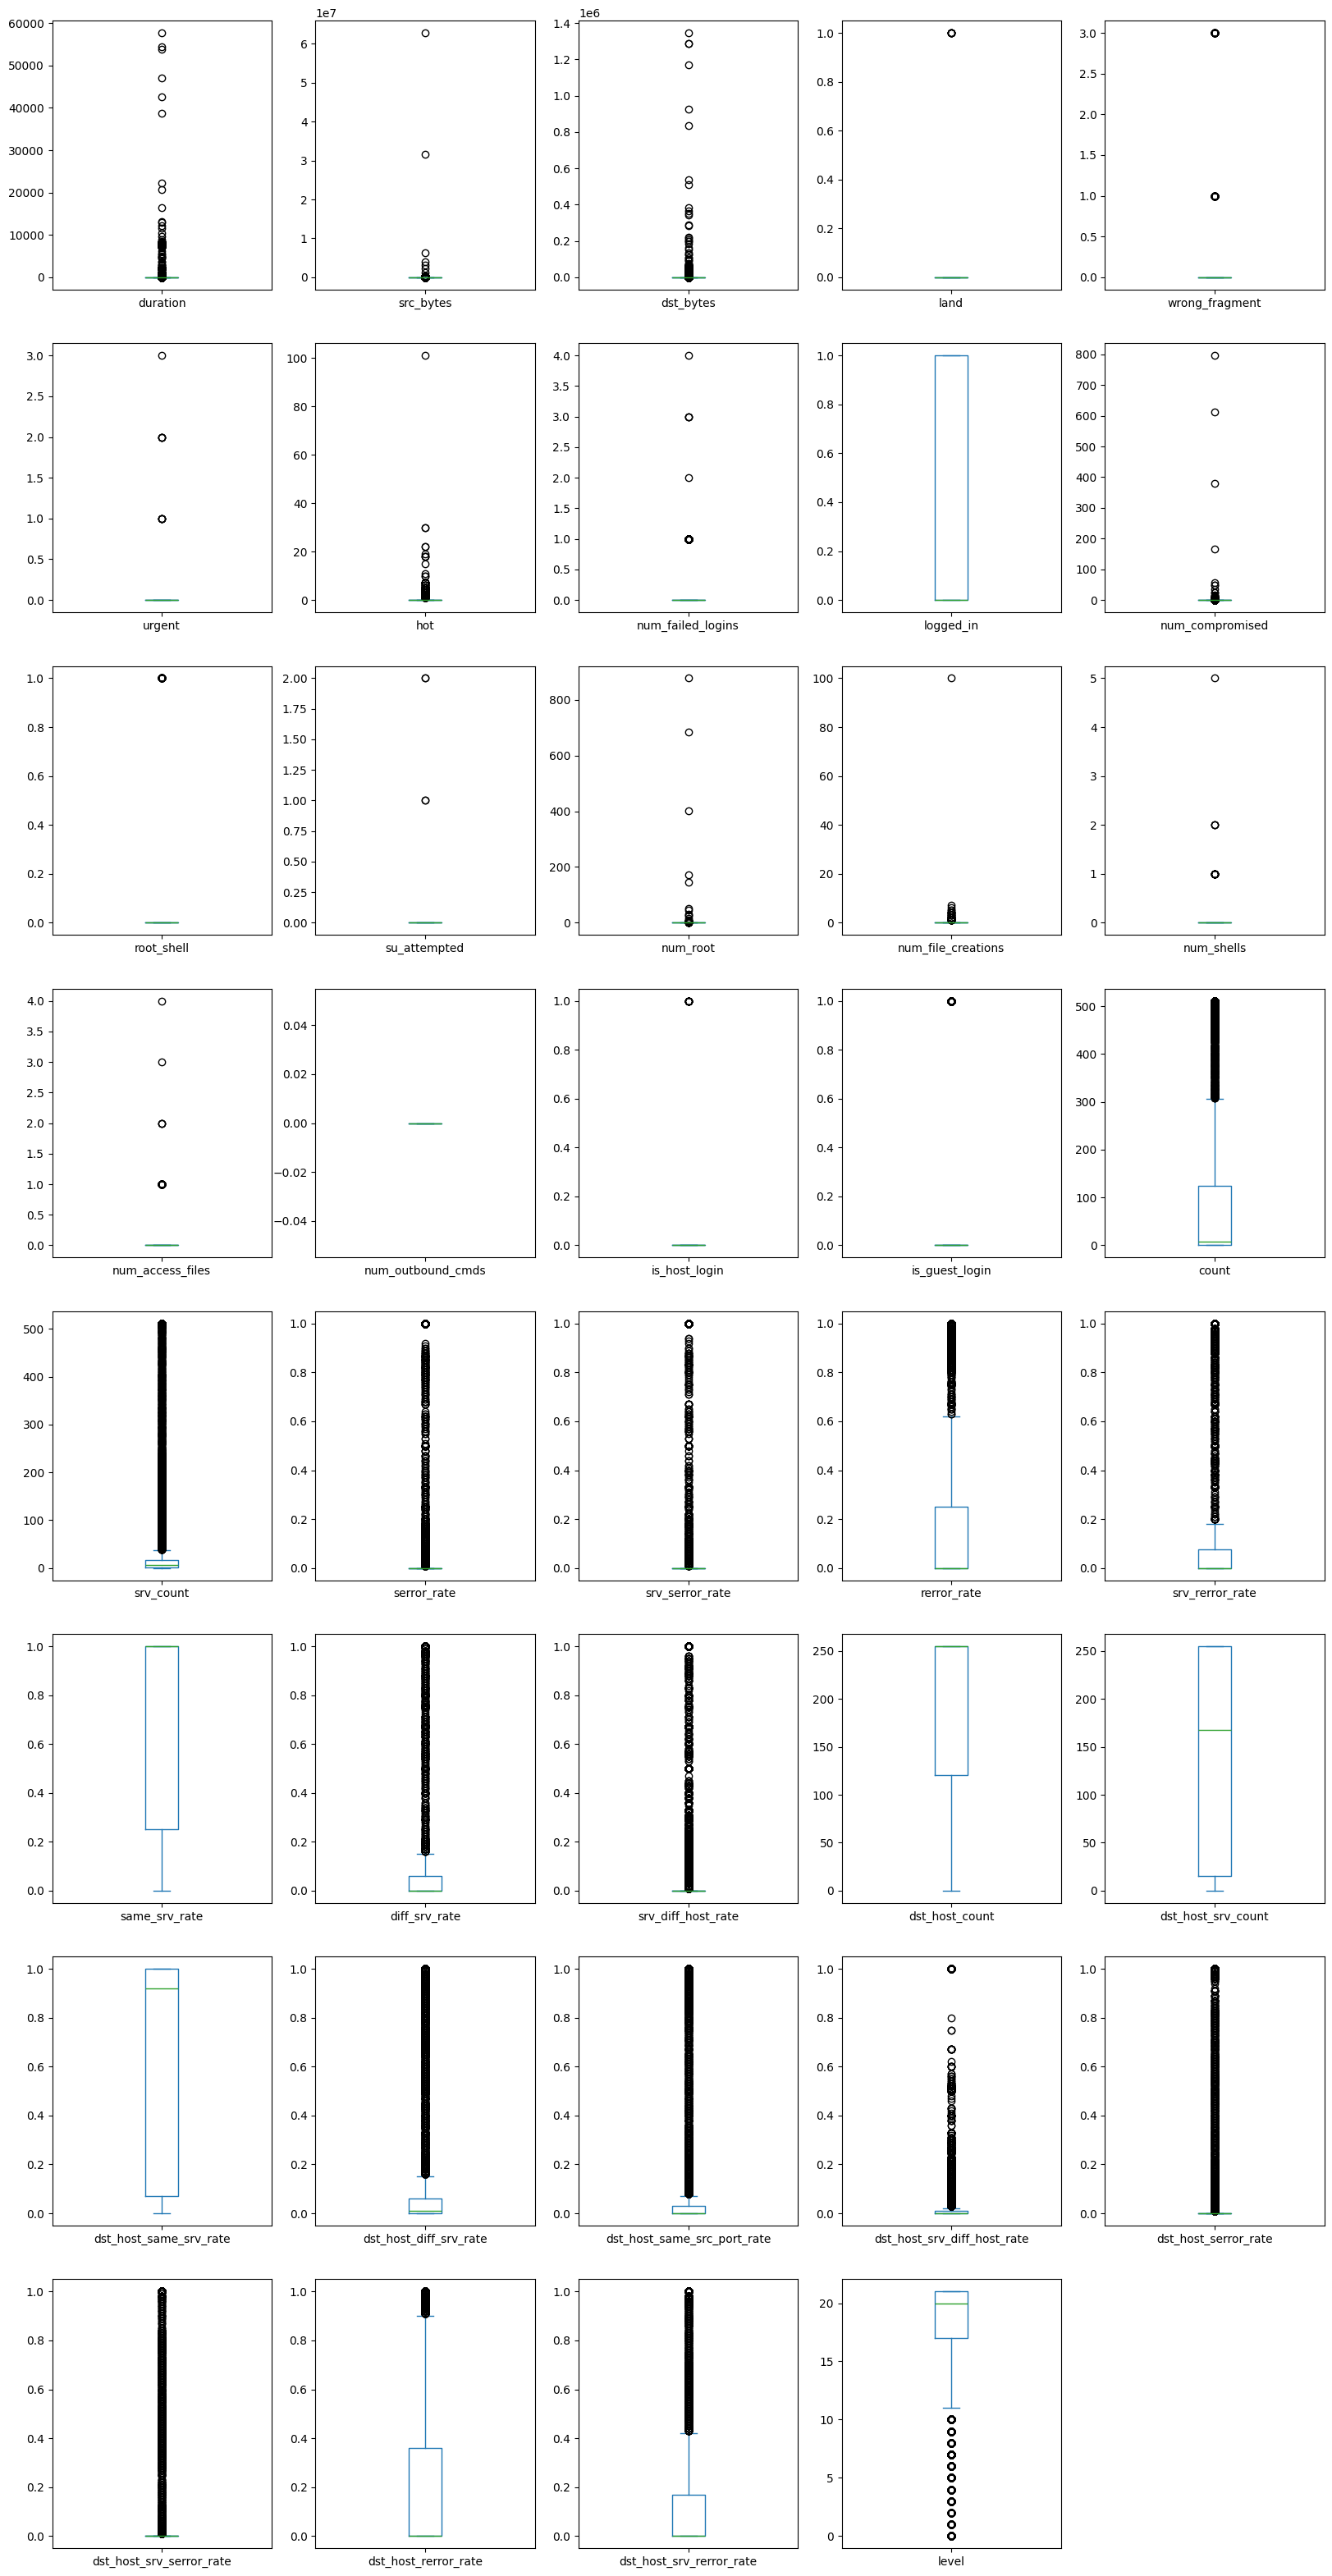

In [10]:
plt.figure(figsize=(20, 40))
data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

## CLASSIFY ATTACK OR NOT

In [11]:
attack_n = []
for i in data.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
data['attack'] = attack_n 
data['attack'].unique()

array(['attack', 'normal'], dtype=object)

## EDA

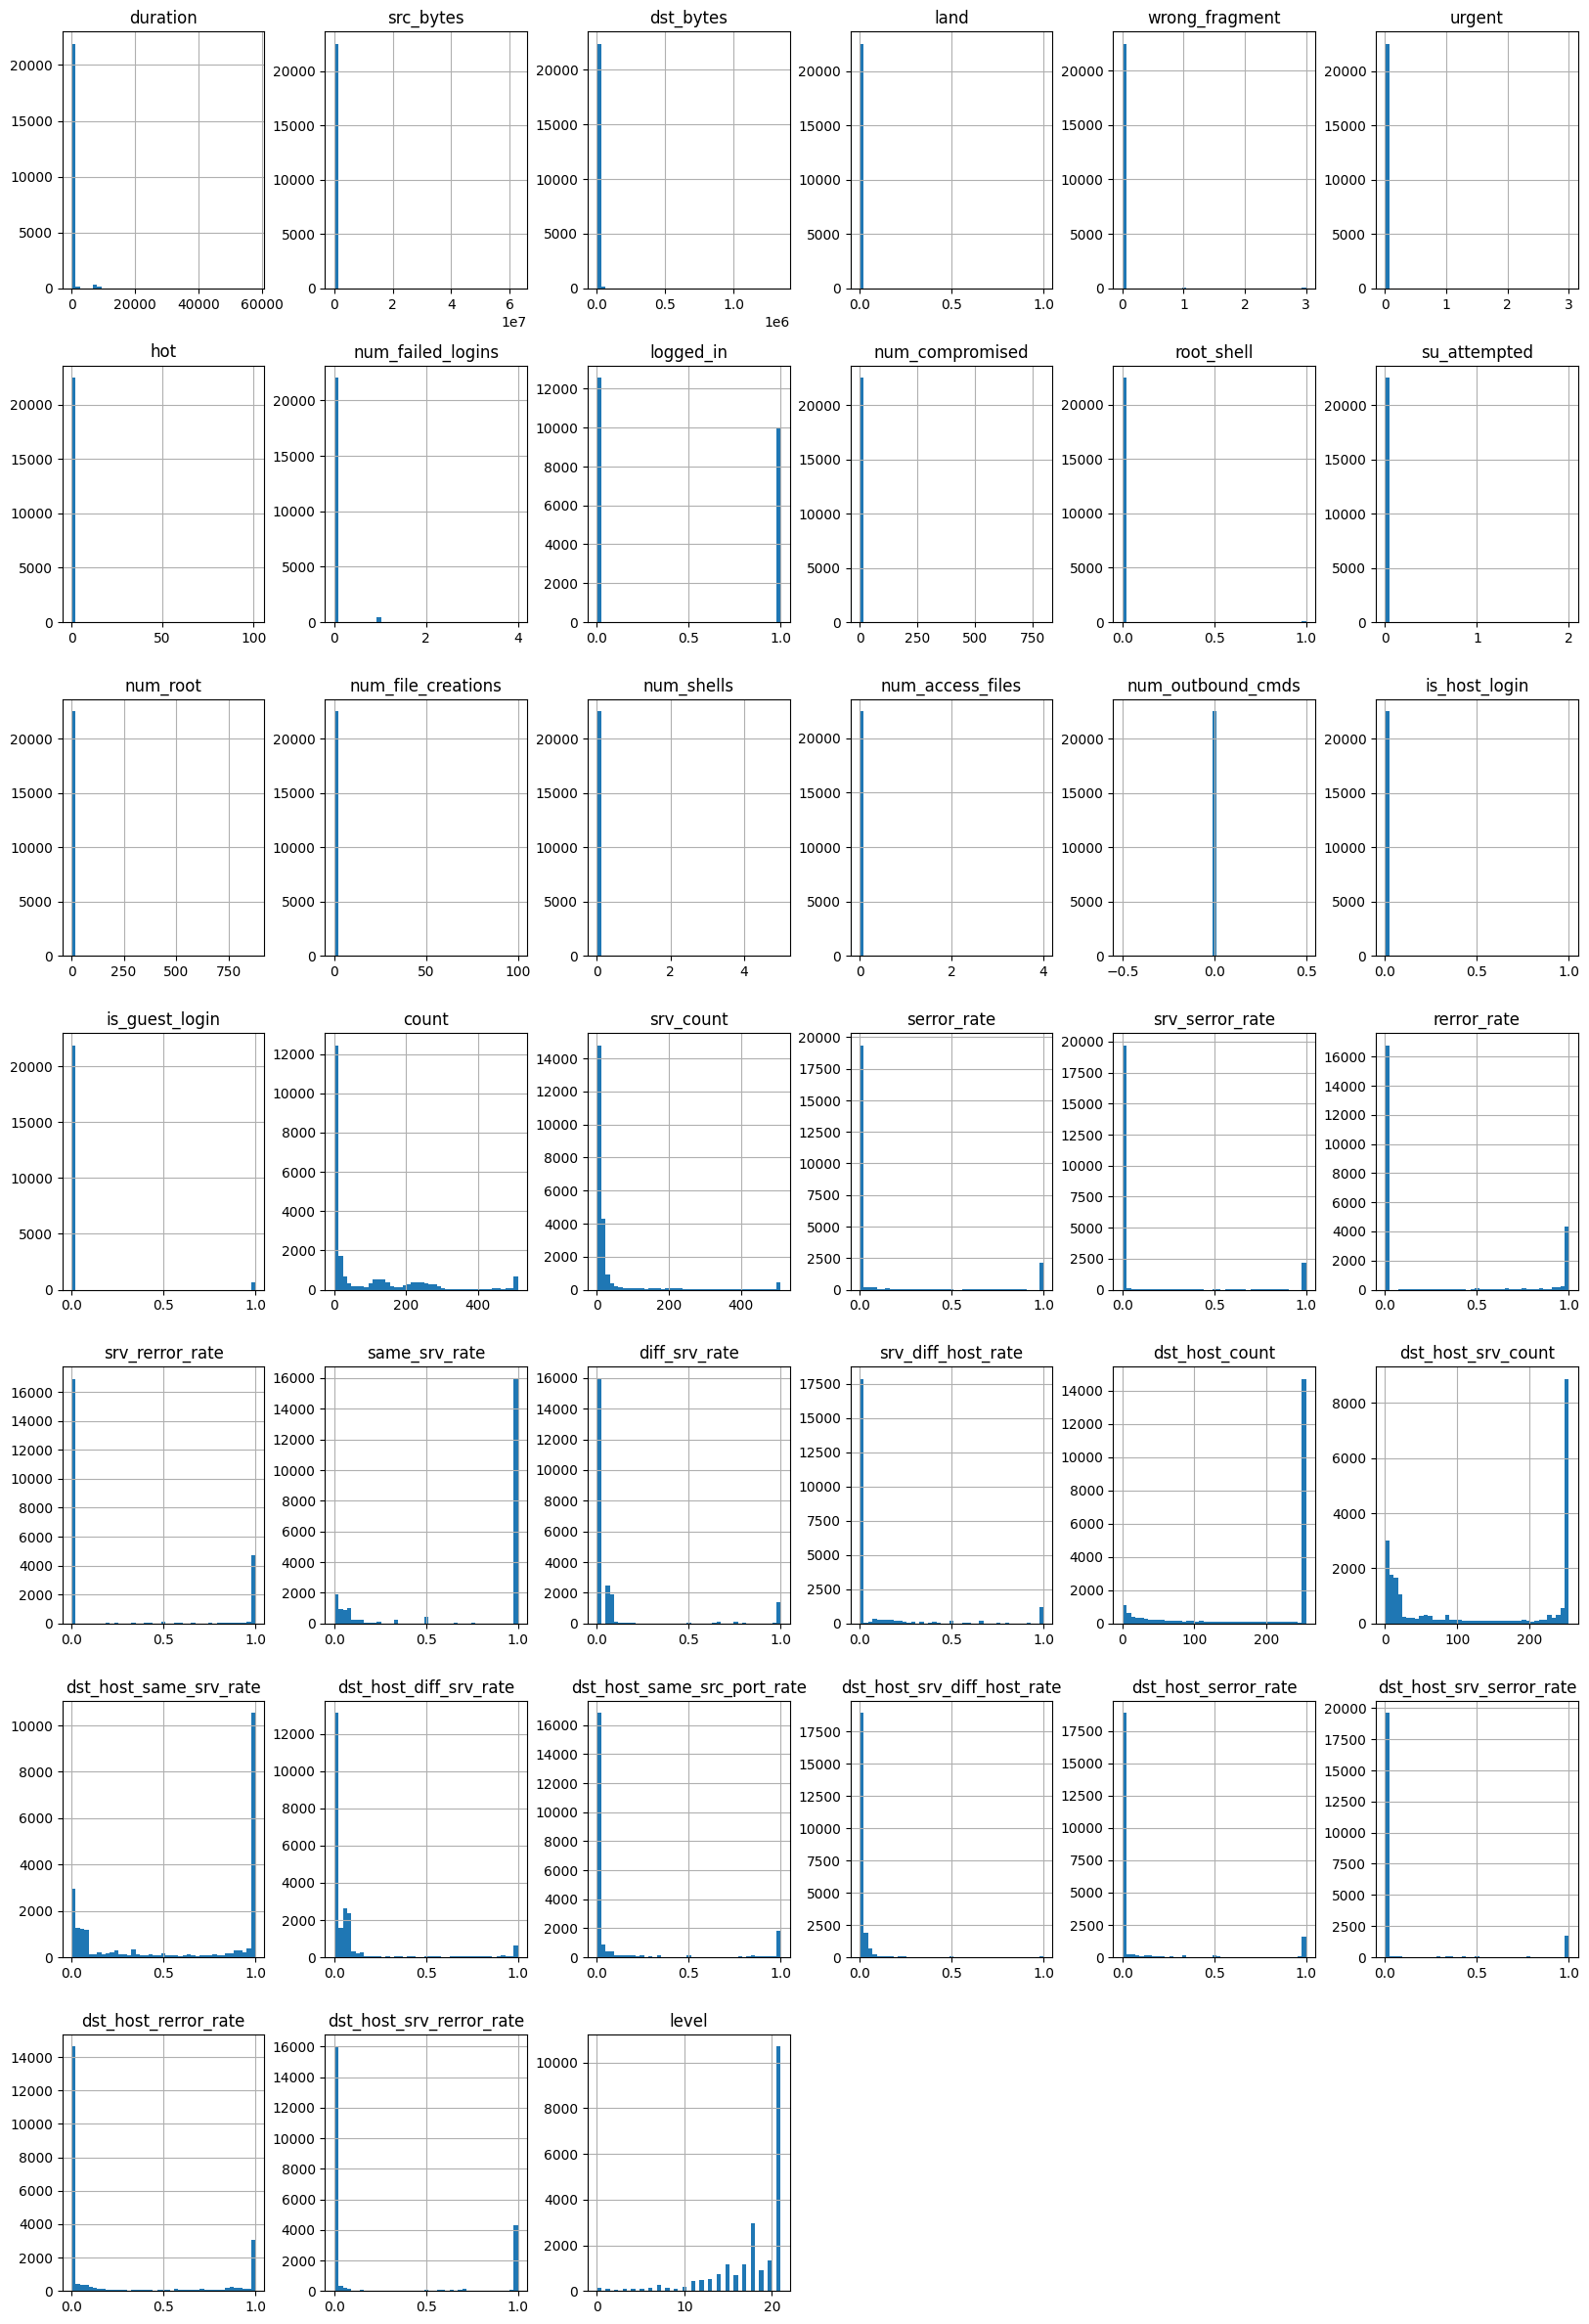

In [12]:
data.hist(bins=43,figsize=(20,30));

## Protocol Type

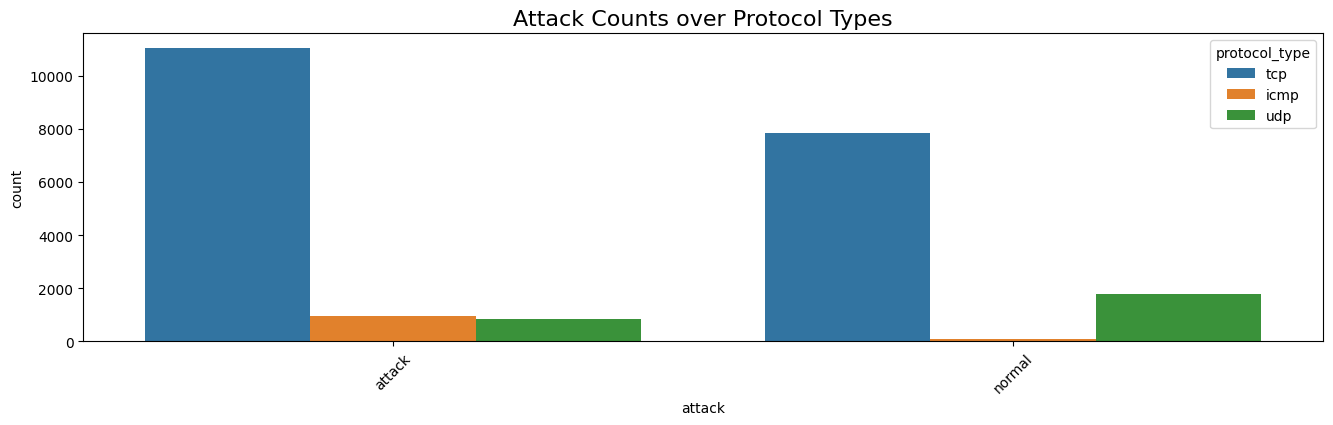

In [13]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack', data=data, hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types', fontdict={'fontsize':16})
plt.show()

In [14]:
data["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.837511
udp     0.116222
icmp    0.046267
Name: proportion, dtype: float64

## Service used general

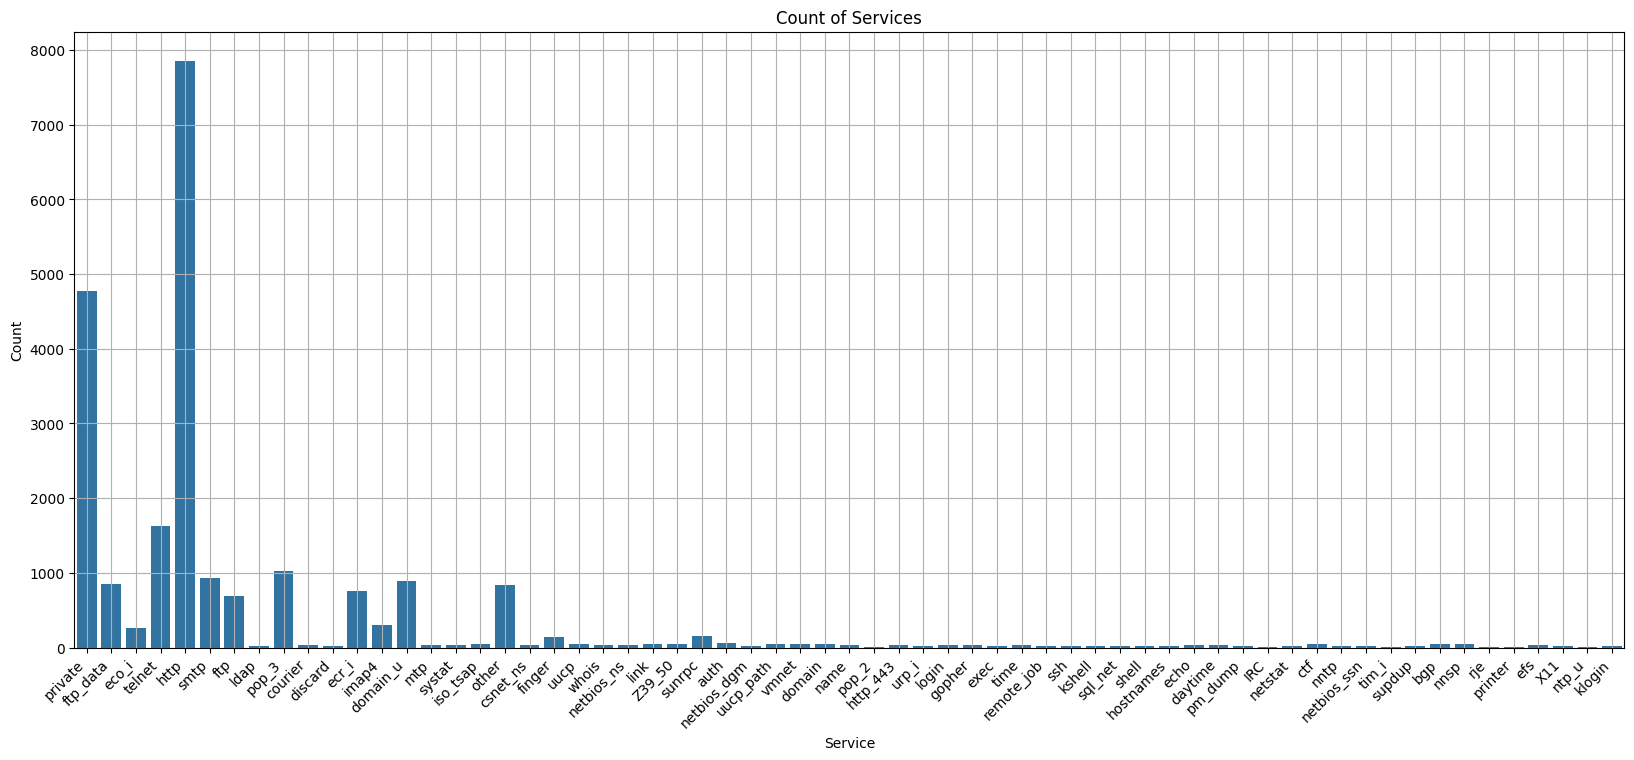

In [15]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

## Service used effect on attacks

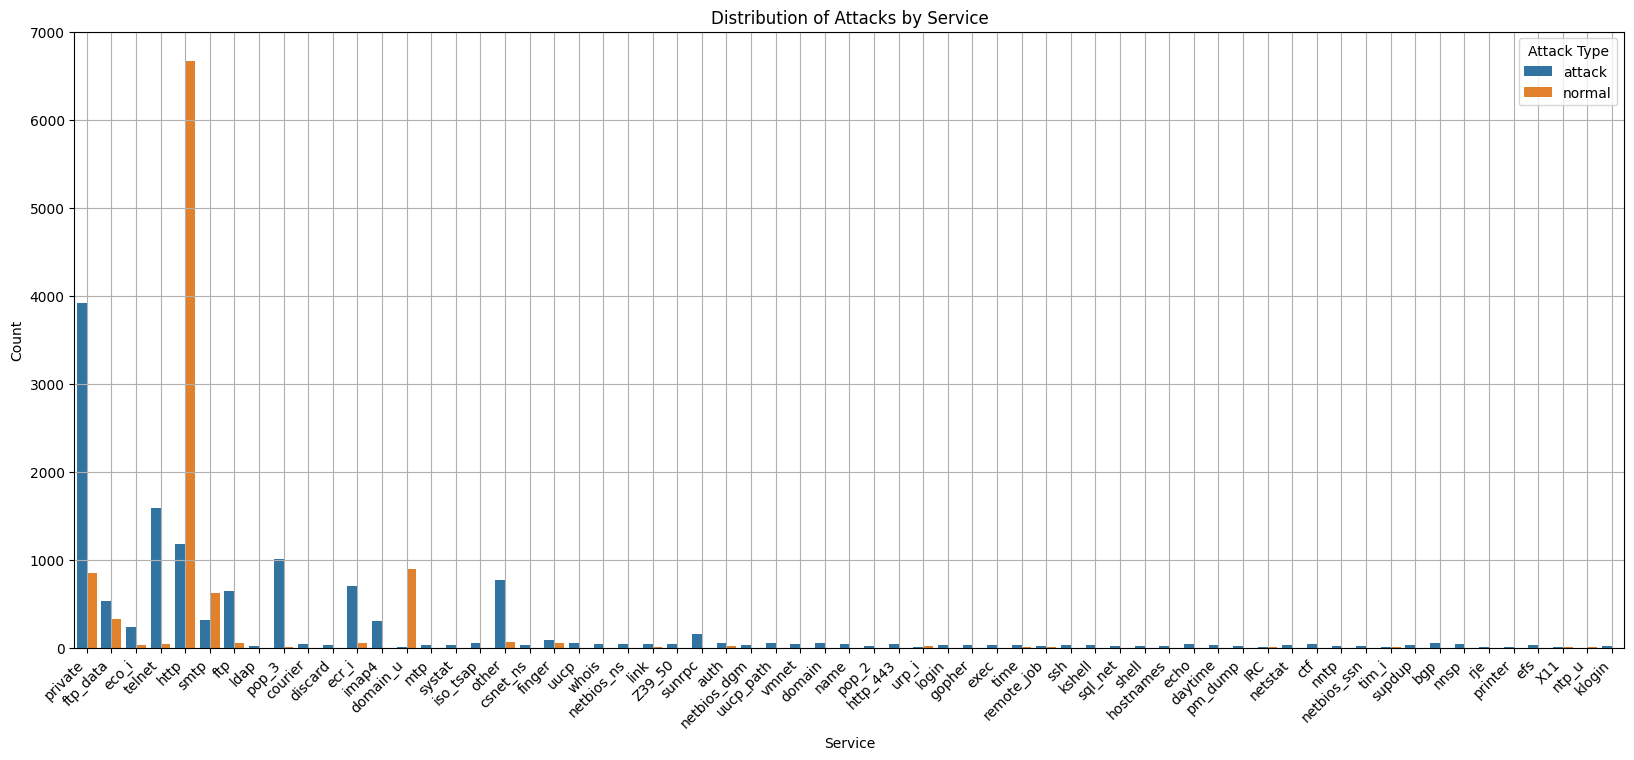

In [16]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## Kernel Density Estimate (KDE) Plot of Duration by Flag

<Figure size 1200x800 with 0 Axes>

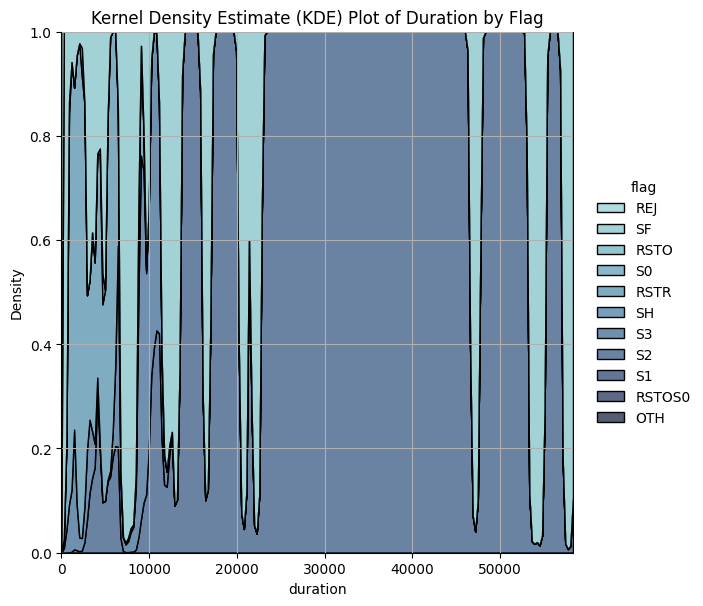

In [17]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=data,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

## Distribution of Attack Types by Guest Login

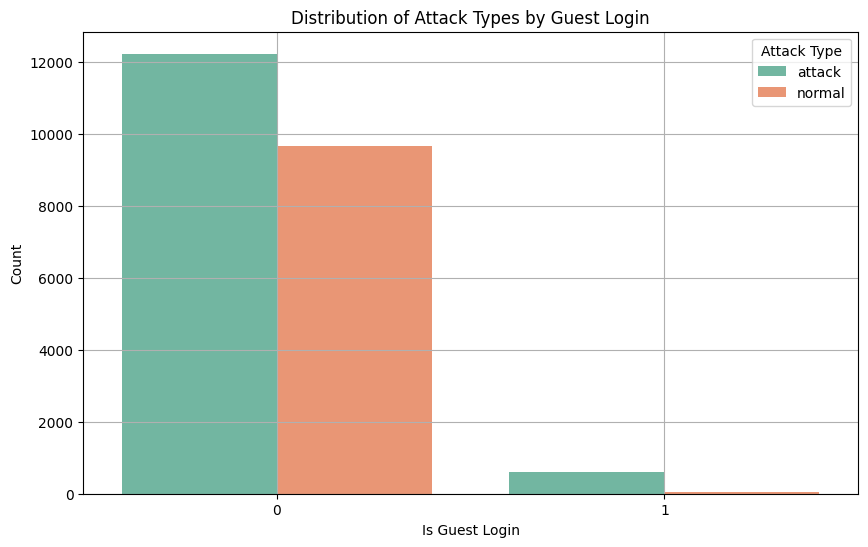

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=data, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## encoding

In [19]:
cat_features = data.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [20]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    data[x]=le.fit_transform(data[x])

## TRAIN-TEST-SPLIT

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(["attack"], axis=1)
y = data["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43)

In [22]:
X_train.shape , X_test.shape


((20288, 42), (2255, 42))

In [23]:
from sklearn.feature_selection import mutual_info_classif


mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.539373
dst_bytes                      0.485889
service                        0.340832
flag                           0.238115
dst_host_srv_count             0.236845
dst_host_diff_srv_rate         0.236219
dst_host_same_srv_rate         0.233158
dst_host_rerror_rate           0.213839
diff_srv_rate                  0.186839
dst_host_srv_rerror_rate       0.183421
count                          0.182334
level                          0.175398
same_srv_rate                  0.170614
logged_in                      0.159752
rerror_rate                    0.159684
srv_rerror_rate                0.147782
dst_host_srv_diff_host_rate    0.128255
dst_host_same_src_port_rate    0.114372
srv_diff_host_rate             0.109041
dst_host_count                 0.085384
dst_host_serror_rate           0.081210
dst_host_srv_serror_rate       0.077084
serror_rate                    0.074324
srv_serror_rate                0.065997
duration                       0.055651


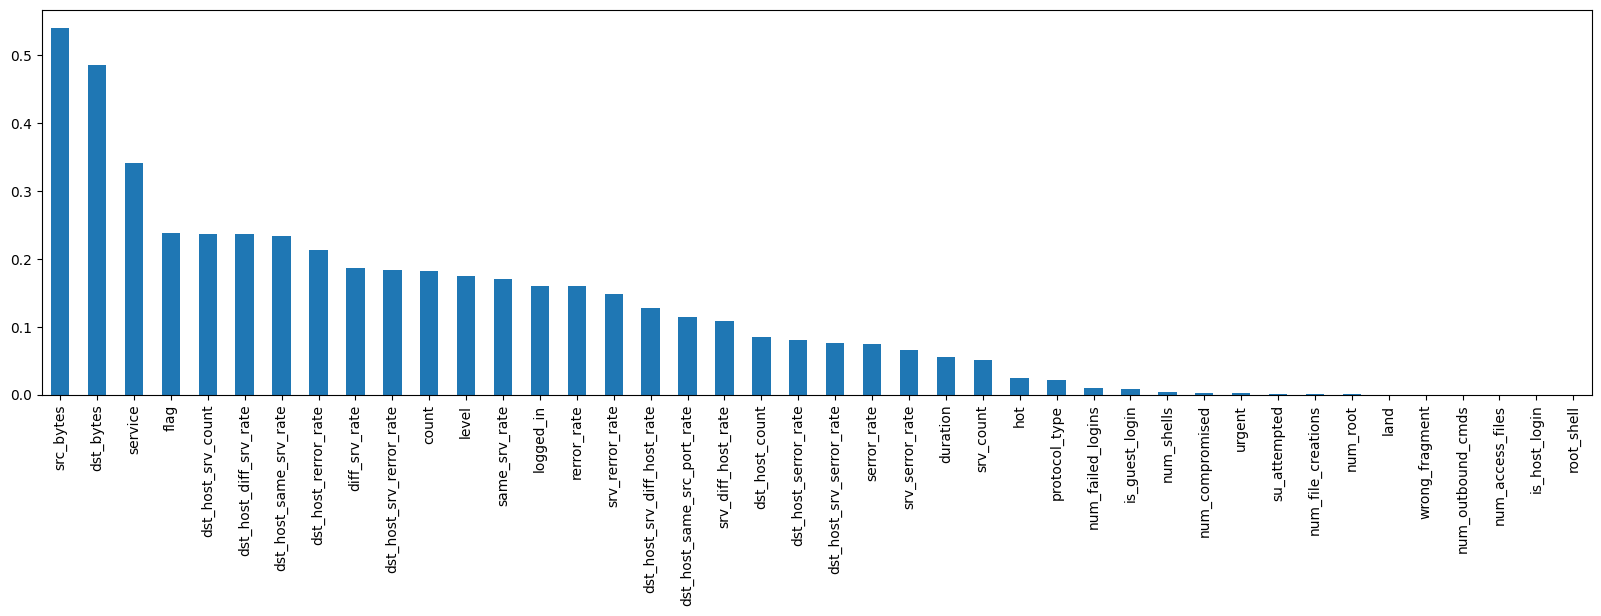

In [24]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

## Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest



Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
X_train.columns[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [26]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [27]:
X_train.shape , X_test.shape


((20288, 15), (2255, 15))

## Scaling

In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

## MODEL BUILD

In [29]:

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [30]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [31]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [32]:
Logistic = Logistic_model.fit(X_train,y_train)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[1269   18]
 [   9  959]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1287
           1       0.98      0.99      0.99       968

    accuracy                           0.99      2255
   macro avg       0.99      0.99      0.99      2255
weighted avg       0.99      0.99      0.99      2255


Train_Set
[[11462    84]
 [   56  8686]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11546
           1       0.99      0.99      0.99      8742

    accuracy                           0.99     20288
   macro avg       0.99      0.99      0.99     20288
weighted avg       0.99      0.99      0.99     20288



In [36]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[1205   82]
 [ 165  803]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1287
           1       0.91      0.83      0.87       968

    accuracy                           0.89      2255
   macro avg       0.89      0.88      0.89      2255
weighted avg       0.89      0.89      0.89      2255


Train_Set
[[10781   765]
 [ 1416  7326]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11546
           1       0.91      0.84      0.87      8742

    accuracy                           0.89     20288
   macro avg       0.89      0.89      0.89     20288
weighted avg       0.89      0.89      0.89     20288



## HYPERPARAMETER TUNING

In [37]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [38]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [39]:
XGB_grid_model.best_score_

np.float64(0.9855373581806843)

In [40]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

## FINAL MODEL

In [41]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=128,
              n_jobs=None, num_parallel_tree=None, ...)

## EVALUATION

In [42]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [43]:
xgb_auc

np.float64(0.9995504954182639)

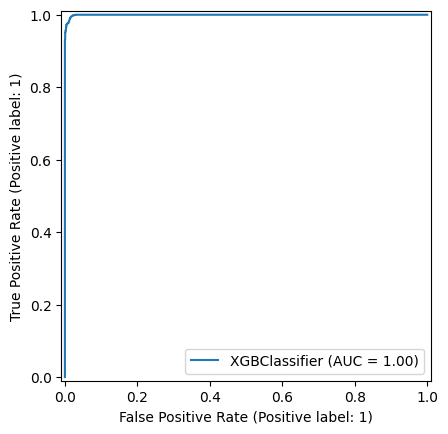

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [45]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[1269   18]
 [  10  958]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1287
           1       0.98      0.99      0.99       968

    accuracy                           0.99      2255
   macro avg       0.99      0.99      0.99      2255
weighted avg       0.99      0.99      0.99      2255


Train_Set
[[11441   105]
 [   80  8662]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11546
           1       0.99      0.99      0.99      8742

    accuracy                           0.99     20288
   macro avg       0.99      0.99      0.99     20288
weighted avg       0.99      0.99      0.99     20288



## FEATURE IMPORTANCE

In [46]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
rerror_rate,0.133747
logged_in,0.131867
src_bytes,0.127159
srv_serror_rate,0.089231
protocol_type,0.074229
duration,0.072279
num_compromised,0.064737
dst_bytes,0.061948
hot,0.050097
service,0.046724


In [47]:
y_pred


array([1, 0, 1, ..., 0, 1, 0], shape=(2255,))

In [48]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'attack', 'normal', ..., 'attack', 'normal', 'attack'],
      shape=(2255,), dtype=object)

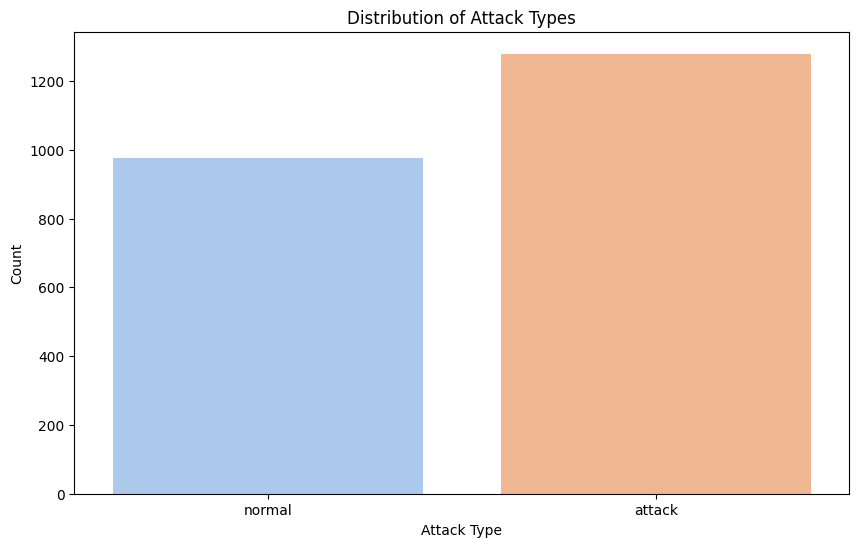

In [49]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()

In [ ]:
import pickle

# Ensure XGB_model is defined before saving
# XGB_model is defined in cell 58

with open("save_model.pkl", "wb") as f:
    pickle.dump(XGB_model, f)

print("✅ Model saved as save_model.pkl")


✅ Model saved as save_model.pkl


In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# 1. Create folder if not exists
os.makedirs("results", exist_ok=True)

# 2. Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.savefig("results/confusion_matrix.png")
plt.close()

# 3. ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # For binary classifier
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("results/roc_curve.png")
plt.close()

print("✅ Images saved to /results folder.")


✅ Images saved to /results folder.
